***FCIM.FIA - Fundamentals of Artificial Intelligence***

> **Lab 4:** *Learning* \\
> **Performed by:** *Bajenov Sevastian*, group *FAF-213* \\
> **Verified by:** Elena Graur, asist. univ.

## Imports and Utils

Create a virtual environment, install all the necessary dependencies so that you can run the notebook using your virtual environment as a kernel.

In [1]:
# pip install -r requirements.txt

## Task 1

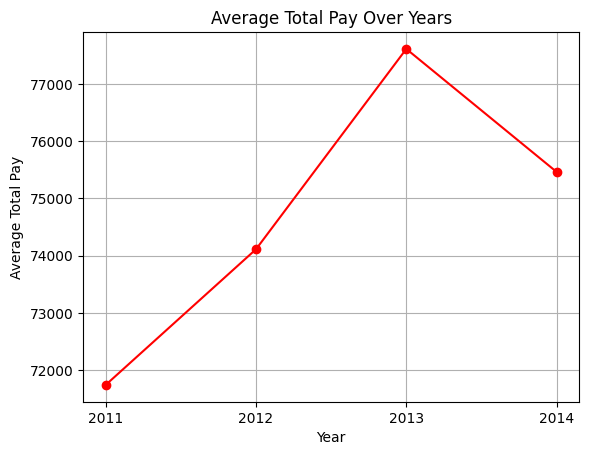

In [ ]:
import pandas as pd

df = pd.read_csv("data.csv", low_memory=False)

average_pay_per_year = df.groupby("Year")["TotalPay"].mean()
plot = average_pay_per_year.plot(kind="line", title="Average Total Pay Over Years", grid=True, color="red", marker="o")

plot.set_ylabel("Average Total Pay");
plot.set_xticks(average_pay_per_year.index);


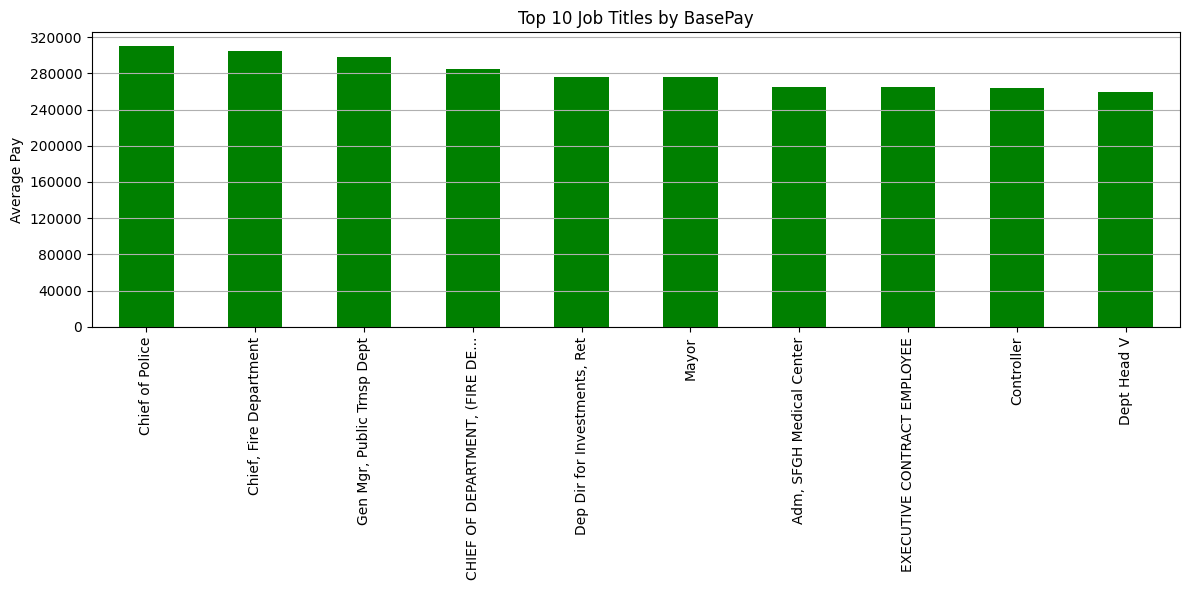

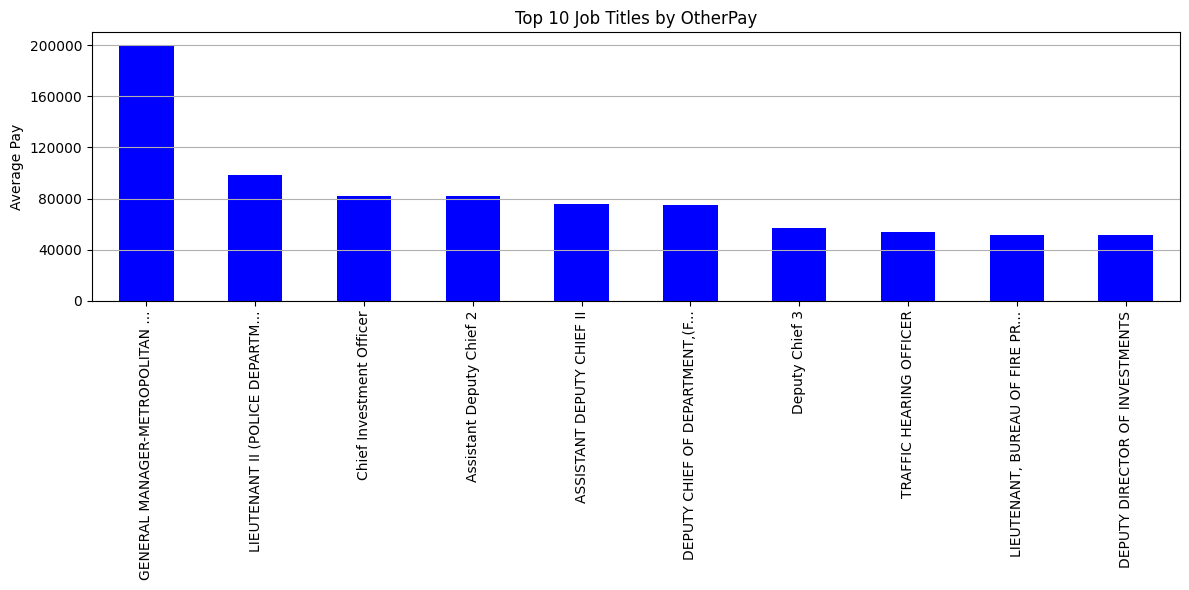

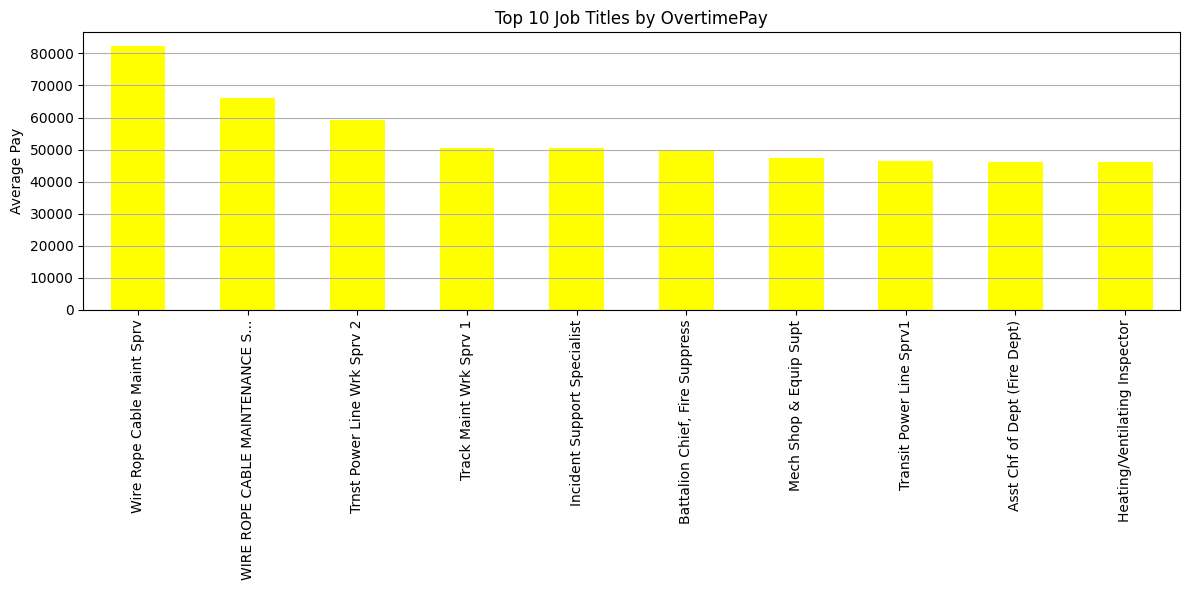

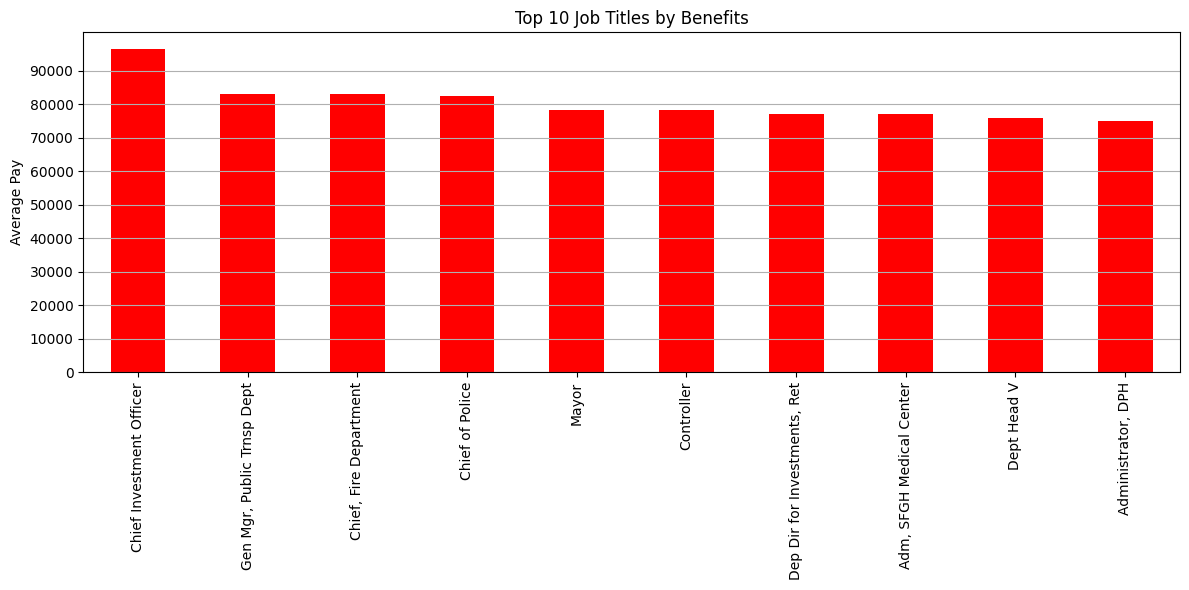

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def truncate_label(label, max_length=32):
    return label if len(label) <= max_length else label[:max_length-3] + '...'

df = pd.read_csv("data.csv", low_memory=False)

columns = {"BasePay": "green", "OtherPay": "blue", "OvertimePay": "yellow", "Benefits": "red"}

for column in columns.keys():
    df[column] = pd.to_numeric(df[column], errors='coerce')
    top_jobs_by_pay = df.groupby("JobTitle")[column].mean().nlargest(10)

    plt.figure() 
    plot = top_jobs_by_pay.plot(kind="bar", figsize=(12, 6), title=f"Top 10 Job Titles by {column}", color=columns[column])
   
    plot.set_xlabel("")
    xlabels = [truncate_label(label) for label in top_jobs_by_pay.index]
    plot.set_xticklabels(xlabels)

    plot.set_ylabel("Average Pay")

    yticks_indent = 0
    yticks_step = 10000

    if top_jobs_by_pay.max() > 100000:
        yticks_indent = 20000
        yticks_step = 40000

    plot.set_yticks(np.arange(0, top_jobs_by_pay.max() + yticks_indent, yticks_step))
    plt.grid(axis='y')
    plt.tight_layout()

    plt.show()


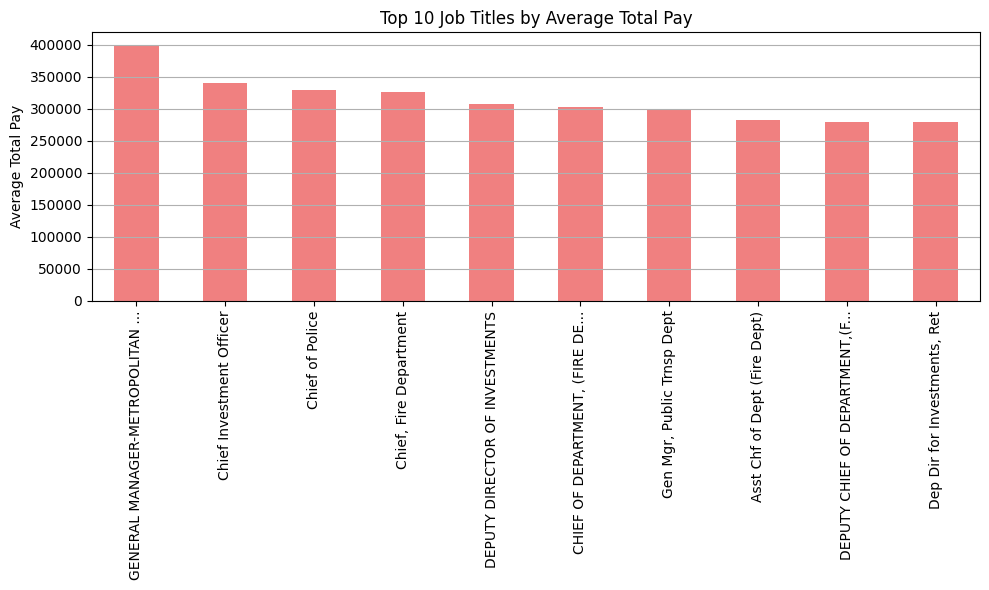

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def truncate_label(label, max_length=32):
    return label if len(label) <= max_length else label[:max_length-3] + '...'

df = pd.read_csv("data.csv", low_memory=False)

top_jobs_by_total_pay = df.groupby("JobTitle")["TotalPay"].mean().nlargest(10)

plt.figure(figsize=(10, 6))
plot = top_jobs_by_total_pay.plot(kind="bar", title="Top 10 Job Titles by Average Total Pay", color='lightcoral')

xlabels = [truncate_label(label) for label in top_jobs_by_total_pay.index]
plot.set_xticklabels(xlabels)
plot.grid(axis='y')
plot.set_xlabel("")
plot.set_yticks(np.arange(0, top_jobs_by_total_pay.max() + 50000, 50000))
plot.set_ylabel("Average Total Pay")

plt.tight_layout()
plt.show()

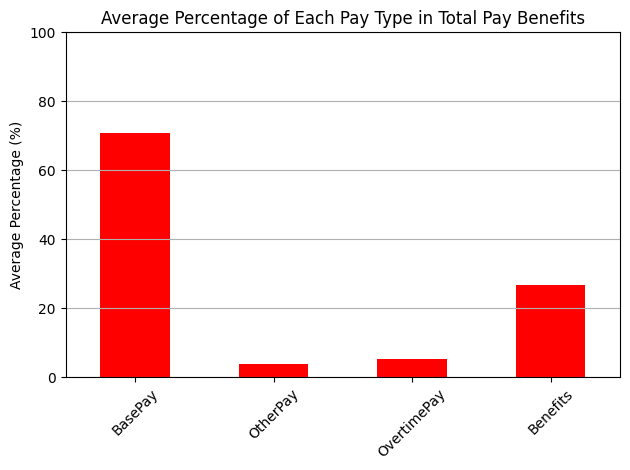

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

def truncate_label(label, max_length=32):
    return label if len(label) <= max_length else label[:max_length-3] + '...'

df = pd.read_csv("data.csv", low_memory=False)

pay_columns = ["BasePay", "OtherPay", "OvertimePay", "Benefits"]
for column in pay_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

average_percentages = {}
for column in pay_columns:
    average_percentages[column] = (df[column].mean() / df["TotalPayBenefits"].mean()) * 100

percentage_df = pd.DataFrame(list(average_percentages.items()), columns=["Pay Type", "Average Percentage"])
percentage_df.set_index("Pay Type", inplace=True)

plot = percentage_df.plot(kind="bar", legend=False, title="Average Percentage of Each Pay Type in Total Pay Benefits", color="red")
plot.set_xlabel("")
plot.set_ylabel("Average Percentage (%)")
plot.set_ylim(0, 100)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Conclusions:

## Acknowledgements


## Bibliography:

1. 